Epoch 100/1000, MSE: 0.5524
Epoch 200/1000, MSE: 0.5524
Epoch 300/1000, MSE: 0.5524
Epoch 400/1000, MSE: 0.5524
Epoch 500/1000, MSE: 0.5524
Epoch 600/1000, MSE: 0.5524
Epoch 700/1000, MSE: 0.5524
Epoch 800/1000, MSE: 0.5524
Epoch 900/1000, MSE: 0.5524
Epoch 1000/1000, MSE: 0.5524
Test MSE: 0.5503


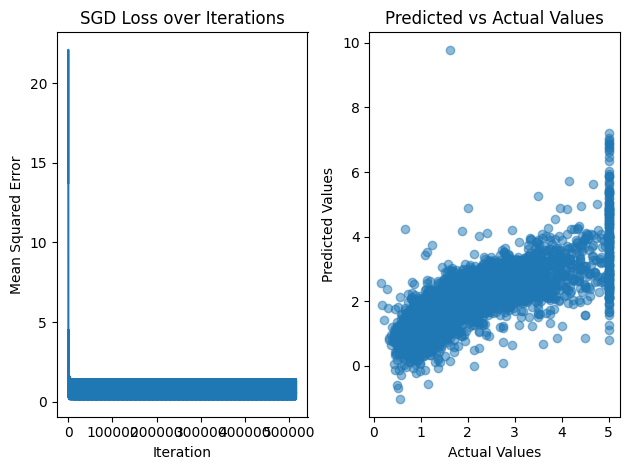

In [ ]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# Load the California housing dataset
data = fetch_california_housing()
X = data.data
y = data.target
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Add bias term to the features
X_train_bias = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_bias = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]
# Hyperparameters
learning_rate = 0.01
num_epochs = 1000
batch_size = 32
# Initialize weights
num_features = X_train_bias.shape[1]
theta = np.random.randn(num_features)
# Stochastic Gradient Descent
loss_history = []
for epoch in range(num_epochs):
    for batch_start in range(0, X_train_bias.shape[0], batch_size):
        batch_end = batch_start + batch_size
        X_batch = X_train_bias[batch_start:batch_end]
        y_batch = y_train[batch_start:batch_end]
        y_pred = np.dot(X_batch, theta)
        error = y_pred - y_batch
        gradient = np.dot(X_batch.T, error) / batch_size
        theta -= learning_rate * gradient
        # Calculate Mean Squared Error (MSE)
        mse = np.mean(error ** 2)
        loss_history.append(mse)
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, MSE: {mse:.4f}")
# Evaluate the model on the test set
y_pred_test = np.dot(X_test_bias, theta)
test_mse = np.mean((y_pred_test - y_test) ** 2)
print(f"Test MSE: {test_mse:.4f}")
# Plot the loss history
plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('SGD Loss over Iterations')
# Plot predicted vs actual values for the test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.tight_layout()
plt.show()